<a href="https://colab.research.google.com/github/Keshvii/Machine-Learning/blob/main/CNN_biomedical_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "keshvi030802",
    "key": "4614552dbe4368c75b4a8d7f4a446f55"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
 99% 1.16G/1.17G [00:14<00:00, 149MB/s]
100% 1.17G/1.17G [00:14<00:00, 87.2MB/s]


In [2]:
import zipfile
zipref=zipfile.ZipFile("/content/labeled-chest-xray-images.zip",'r')
zipref.extractall()
zipref.close()

In [3]:
train_dir = "/content/chest_xray/train/"
test_dir = "/content/chest_xray/test/"

(1013, 1236)


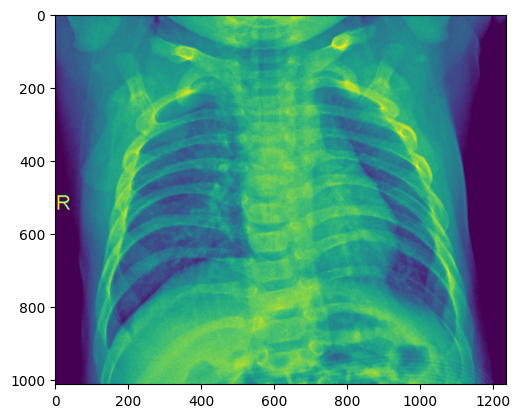

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

fpath=r'/content/chest_xray/train/NORMAL/NORMAL-1014768-0001.jpeg'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

['NORMAL-518175-0001.jpeg']
image shape : (1222, 1728)


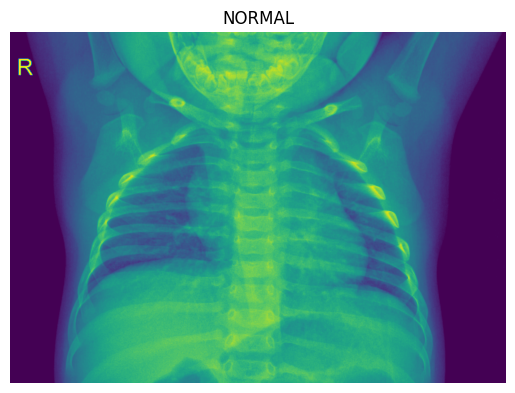

In [6]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "NORMAL")

['VIRUS-6561286-0002.jpeg']
image shape : (586, 923, 3)


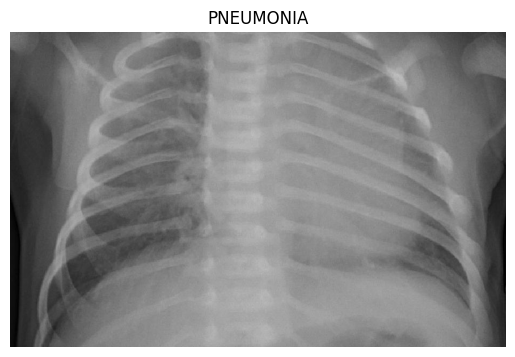

In [7]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "PNEUMONIA")

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Preprocessing
#Normalization, reshaping, noise removal
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(320,320),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(320,320),
                                               class_mode="binary",
                                               batch_size=32)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [10]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [11]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(320, 320),
    batch_size=32,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(320, 320),
    batch_size=32,
    class_mode="binary"
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
# Define the model
model_xray_l = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(320, 320, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_xray_l.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_xray_l.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 318, 318, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 159, 159, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 157, 157, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 60840)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          60,841 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,031 (242.31 KB)

 Trainable params: 62,031 (242.31 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_xray_l = model_xray_l.fit(
    train_data_augmented,
    validation_data=test_data,
    epochs=3
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.7079 - loss: 0.6842 - val_accuracy: 0.7067 - val_loss: 0.5971
Epoch 2/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - accuracy: 0.8686 - loss: 0.3045 - val_accuracy: 0.8686 - val_loss: 0.3058
Epoch 3/3
164/164 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.8836 - loss: 0.2912 - val_accuracy: 0.8734 - val_loss: 0.2938


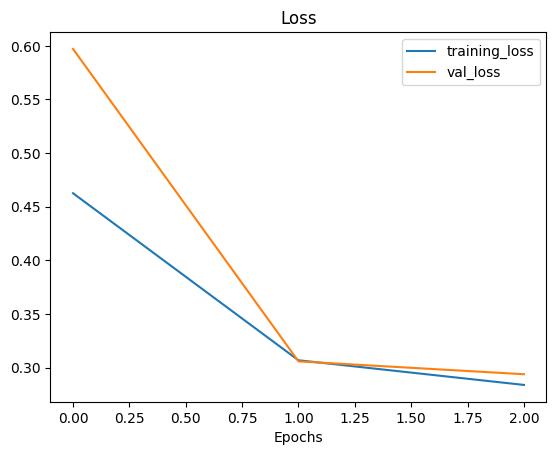

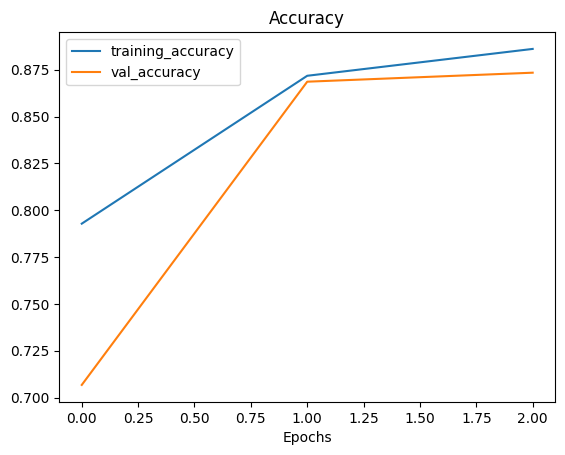

In [15]:
# Plot loss and accuracy curves
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

plot_loss_curves(history_xray_l)

In [16]:
# Image prediction function
def load_prep(filename, img_shape=320):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img / 255.
    return img

def pred_and_plot(model, filename, class_names):
    img = load_prep(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))[0][0]
    pred_class = class_names[int(pred > 0.5)]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [18]:
class_names = ["Normal", "Pneumonia"]
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1680.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-100.png

--2024-10-17 10:10:23--  https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1680.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-17 10:10:24 ERROR 404: Not Found.

--2024-10-17 10:10:24--  https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-100.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-17 10:10:24 ERROR 404: Not Found.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


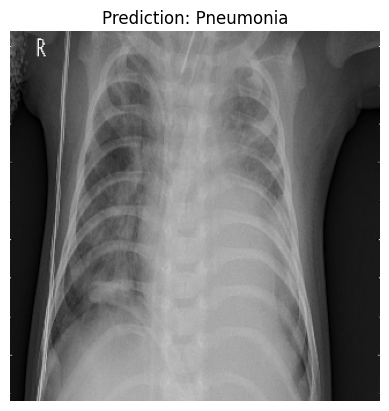

In [19]:
pred_and_plot(model_xray_l, "/content/BACTERIA-3105669-0001.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


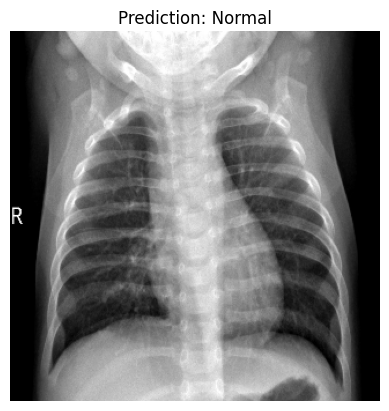

In [20]:
pred_and_plot(model_xray_l, "/content/NORMAL-4534031-0001.jpeg", class_names)